# Deutsch Algorithm

> Note: This notebook is strongly inspired by the [Qiskit tutorial on the Deutsch algorithm](https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#deutschs-algorithm).*

The Deutsch algorithm is the first quantum algorithm to demonstrate a clear quantum advantage.  
It determines whether a given one-bit Boolean function $f:\{0,1\} \to \{0,1\}$ is **constant** (returns the same value for both inputs) or **balanced** (returns different values for inputs 0 and 1), using only a single function evaluation.

This notebook implements the Deutsch algorithm and shows how quantum computation can outperform classical approaches for this simple problem.


## Define the Oracle

The oracle is a quantum circuit that encodes a classical function $f(x)$ such that:
\begin{equation*}
U_f \ket{x}\ket{y} = \ket{x}\ket{y \oplus f(x)}
\end{equation*}

For this demonstration, we will define oracles for both constant and balanced functions.


In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [2]:
def constant_oracle():
    """Oracle for a constant function: f(0)=f(1)=0."""
    qc = QuantumCircuit(2)
    # No gate needed since f(x) = 0 for all x
    return qc

def balanced_oracle():
    """Oracle for a balanced function: f(0)=0, f(1)=1."""
    qc = QuantumCircuit(2)
    qc.cx(0, 1)  # XOR between input and output qubit
    return qc

## Deutsch Algorithm Circuit

Construct the quantum circuit for the Deutsch algorithm:
1. Initialize two qubits: input $\ket{0}$, output $\ket{1}$
2. Apply Hadamard gates to both qubits
3. Apply the function oracle
4. Apply a Hadamard gate to the input qubit
5. Measure the input qubit


In [3]:
def compile_circuit(oracle: QuantumCircuit):
    """
    Assembles the Deutsch algorithm quantum circuit with the provided oracle.
    """
    qc = QuantumCircuit(2, 1)  # 2 qubits, 1 classical bit

    # Step 1: Initialize the output qubit to |1⟩
    qc.x(1)
    qc.barrier()

    # Step 2: Apply Hadamard to both qubits
    qc.h([0, 1])
    qc.barrier()

    # Step 3: Append the oracle Uf
    qc.append(oracle, [0, 1])
    qc.barrier()

    # Step 4: Apply Hadamard to the input qubit
    qc.h(0)

    # Step 5: Measure the input qubit
    qc.measure(0, 0)

    return qc


## Run the Deutsch Algorithm

The measurement outcome determines the nature of the function:
- If the result is `0`, the function is **constant**.
- If the result is `1`, the function is **balanced**.

Let's test both types of oracles.


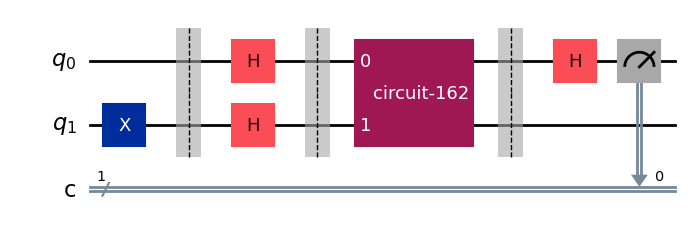

Constant oracle result: constant


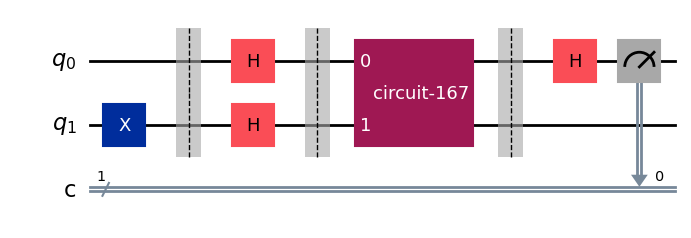

Balanced oracle result: balanced


In [4]:
def deutsch_algorithm(oracle: QuantumCircuit):
    """
    Runs the Deutsch algorithm with the specified oracle.
    Returns 'constant' or 'balanced' based on the measurement result.
    """
    qc = compile_circuit(oracle)
    display(qc.draw('mpl'))

    result = AerSimulator().run(transpile(qc, AerSimulator()), shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

# Test with a constant function oracle
print("Constant oracle result:", deutsch_algorithm(constant_oracle()))

# Test with a balanced function oracle
print("Balanced oracle result:", deutsch_algorithm(balanced_oracle()))


## Interpretation

The Deutsch algorithm determines whether the oracle implements a constant or balanced function using only **one** function evaluation.  
A classical approach would require two evaluations to determine the same result.

This demonstrates the quantum speedup made possible by quantum parallelism and interference.
